In [11]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
#from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
#plt.style.use('./deeplearning.mplstyle')

In [12]:
#matrix of size and price\

x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])
w =209
b =2.4


In [13]:
#def of computing cost by eaching example from 1 to m
#args :
""" 
    x(ndarray (m,)): data , m examples
    y (ndarray(m,)): target values 
    w,b (scaler): models parameters
    
    returns 
       total_cost(float): to fit thedata points in x and y

"""
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost_sum =0
    for i in range (m):
        f_wb = w* x[i]+b 
        cost= (f_wb - y[i])** 2
        cost_sum +=cost 
    total_cost =( 1/ (2*m)) * cost_sum
    
    return total_cost
    

In [14]:
test = compute_cost(x_train, y_train , w , b)
print(test)


1736.2683333333327


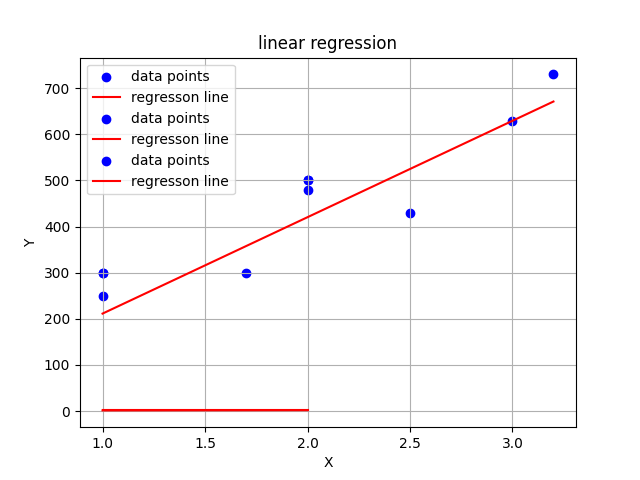

In [15]:
#visual
plt.scatter(x_train, y_train, color = 'blue', label = 'data points')
plt.plot(x_train, w * x_train + b ,color ='red', label= 'regresson line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('linear regression')
plt.legend()
plt.grid(True)
plt.show()